In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import time


df = pd.read_csv('base_datos_2008.csv.bz2', nrows = 100000)
df2 = df[df["Origin"].isin(["ATL", "HOU", "IND"])]
df = df.head(500000)

In [2]:
times = []
for i in np.arange(len(df)):
    times.append(datetime.datetime(year=2008, month=df.loc[i,"Month"], day=df.loc[i, "DayofMonth"]))

In [3]:
times[5000]

datetime.datetime(2008, 1, 4, 0, 0)

In [4]:
df["Time"] = times

In [6]:
data = df.groupby(by=["Time"], as_index=False)["DepDelay", "ArrDelay"].mean()
data

<ipython-input-6-b196d328a79b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"], as_index=False)["DepDelay", "ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,13.074074,6.936508
1,2008-01-02,13.234043,8.159574
2,2008-01-03,25.289861,20.432153
3,2008-01-04,18.493897,14.235814
4,2008-01-05,23.172296,19.265662
5,2008-01-06,19.194052,14.718243
6,2008-01-07,9.154469,4.839978
7,2008-01-08,5.783920,1.065345
8,2008-01-09,3.269252,-2.373348
9,2008-01-10,5.421998,0.267697


c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

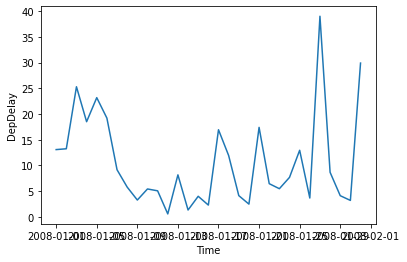

In [7]:
sns.lineplot(data["Time"], data["DepDelay"])

In [8]:
data = df.groupby(by=["Time"])["DepDelay", "ArrDelay"].mean()
data.head()

<ipython-input-8-d821fb820e5c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"])["DepDelay", "ArrDelay"].mean()


,DepDelay,ArrDelay
Time,,
2008-01-01,13.074074,6.936508
2008-01-02,13.234043,8.159574
2008-01-03,25.289861,20.432153
2008-01-04,18.493897,14.235814
2008-01-05,23.172296,19.265662


<AxesSubplot:xlabel='Time'>

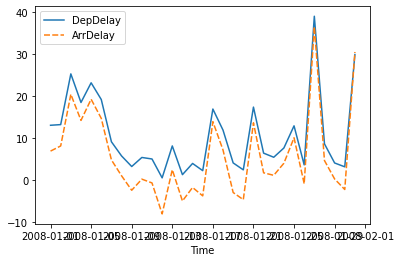

In [9]:
sns.lineplot(data=data)

In [10]:
times = []
for i in df2.index:
    times.append(datetime.datetime(year=2008, month=df2.loc[i,"Month"], day = df2.loc[i, "DayofMonth"]))

df2["Time"] = times

<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

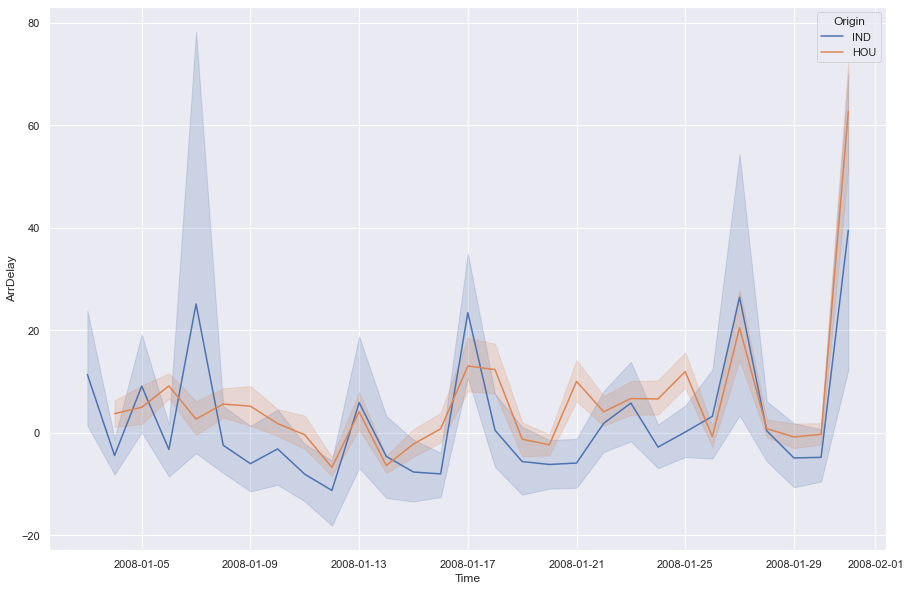

In [11]:
sns.set(rc={"figure.figsize": (15,10)})
sns.lineplot(x="Time", y="ArrDelay", hue="Origin", data=df2)